###  Load the data

In [1]:
import pandas as pd
import numpy as np

#load the data
df = pd.read_csv("cirrhosis.csv")

print("Shape",df.shape)
#print(df.head())
print("\nData Types and non-null counts:",df.info())
print("\nNumeric summary statistics:")
display(df.describe().T)

print("\nMissing value counts:")
print(df.isnull().sum())

#Identify numeric columns
num_cols = df.select_dtypes(include=['float64','int64']).columns
print("\nNumerical colums:",num_cols)
#Identify categorical columns
cat_cols = df.select_dtypes(include=['object','category']).columns
print("\nCategorical columns:",cat_cols)

#value counts for each categorical column
for col in cat_cols:
    print(f"\n-- {col} --")
    print(df[col].value_counts(dropna=False))

#Check duplicates
print("\nDuplicate rows:",df.duplicated().sum())

Shape (418, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00



Missing value counts:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Numerical colums: Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

Categorical columns: Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

-- Status --
Status
C     232
D     161
CL     25
Name: count, dtype: int64

-- Drug --
Drug
D-penicillamine    158
Placebo            154
NaN                106
Name: count, dtype: int64

-- Sex --
Sex
F    374
M   

###  Missing value handle

    During the exploratory data analysis, I observed that the features
    [Drug, Ascites, Hepatomegaly, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Triglycerides]
    had 106 missing values simultaneously from row [313] to [418], corresponding to ~25% of the dataset.

    Since those 9 features are missing simultaneously for the same 106 patients, that means it’s not random noise but a systematic missingness.

    Since imputing such a large block of missing values (9 features together) could introduce bias and noise, I chose to remove those 106 rows. This ensures that the dataset remains consistent and reliable for model development, even though it reduces the sample size.

    After removal, the dataset size reduced from 418 -> 312 patients.

In [2]:
### drop simultaneous empty values
rows_to_drop = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides']

df_all = df.copy()

# Drop rows where ALL of these columns are null simultaneously
df = df[~df[rows_to_drop].isnull().all(axis=1)]

print(f"Rows before dropping: {len(df_all)}")
print(f"Rows after dropping: {len(df)}")

###age is converted to year
df['Age'] = df['Age'] / 365

print(df.head())

df = df.copy()
#Numeric missing value handling
for col in num_cols:
    missing_count = df[col].isnull().sum()
    if missing_count>0:
        skewness = df[col].skew()
        if abs(skewness) < 0.5:
            df.loc[:, col] = df[col].fillna(df[col].mean())
        else:
            df.loc[:, col] = df[col].fillna(df[col].median())

#check if missing value remain
print(df[num_cols].isnull().sum())

print(cat_cols)
#cat col missing value handling
for col in cat_cols:
    missing_count = df[col].isnull().sum()
    if missing_count>0:
        df[col] = df[col].fillna(df[col].mode()[0])

print(df[num_cols].isnull().sum())
print(df[cat_cols].isnull().sum())
 

Rows before dropping: 418
Rows after dropping: 312
   ID  N_Days Status             Drug        Age Sex Ascites Hepatomegaly  \
0   1     400      D  D-penicillamine  58.805479   F       Y            Y   
1   2    4500      C  D-penicillamine  56.484932   F       N            Y   
2   3    1012      D  D-penicillamine  70.120548   M       N            N   
3   4    1925      D  D-penicillamine  54.778082   F       N            Y   
4   5    1504     CL          Placebo  38.131507   F       N            Y   

  Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0       Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1       Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2       N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3       Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4       Y     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides 

###  Split the data set into training and test set with a ratio of  (8:2).

In [3]:
from sklearn.model_selection import train_test_split

print("Check Empty Status: ",df['Status'].isnull().sum())
#Map status 
status_map = {'D':0, 'C':1, 'CL':2}
df['Status'] = df['Status'].map(status_map)

print("After Mapping: ",df['Status'].value_counts())

X = df.drop(columns=['ID','Status'], axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7, stratify=y)

print("Train set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set class distribution:\n", y_test.value_counts(normalize=True))

Check Empty Status:  0
After Mapping:  Status
1    168
0    125
2     19
Name: count, dtype: int64
Train set class distribution:
 Status
1    0.538153
0    0.401606
2    0.060241
Name: proportion, dtype: float64

Test set class distribution:
 Status
1    0.539683
0    0.396825
2    0.063492
Name: proportion, dtype: float64


###  Show the feature types and indicate which features are continuous or categorical. 

In [4]:

# Identify feature types in training data
num_cols_train = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols_train = X_train.select_dtypes(include=['object', 'category']).columns

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nNumerical features (continuous):", list(num_cols_train))
print("Categorical features:", list(cat_cols_train))

Train shape: (249, 18)
Test shape: (63, 18)

Numerical features (continuous): ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Categorical features: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


###  Necessary encoding for the categorical features. 
 

In [5]:
from sklearn.preprocessing import LabelEncoder
print("Shape after missing value handling:",X_train.shape)

X_train_encode = X_train.copy()
X_test_encode = X_test.copy()

#label encoder
le = LabelEncoder()
X_train_encode['Sex'] = le.fit_transform(X_train_encode['Sex'])
X_test_encode['Sex'] = le.transform(X_test_encode['Sex'])

#One hot encoder
cat_col_rest = [col for col in X_train_encode.select_dtypes(include=['object','category']).columns if col != 'Sex']

X_train_encode = pd.get_dummies(X_train_encode,columns=cat_col_rest,drop_first=False)
X_test_encode = pd.get_dummies(X_test_encode,columns=cat_col_rest,drop_first=False)

X_train_encode,X_test_encode = X_train_encode.align(X_test_encode, join='left',axis=1,fill_value=0)

print("Shape after Encoding:",X_train_encode.shape) 
print("\n X Test",X_test_encode.shape)
print(X_train_encode.info())

Shape after missing value handling: (249, 18)
Shape after Encoding: (249, 24)

 X Test (63, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 29 to 144
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                249 non-null    int64  
 1   Age                   249 non-null    float64
 2   Sex                   249 non-null    int64  
 3   Bilirubin             249 non-null    float64
 4   Cholesterol           249 non-null    float64
 5   Albumin               249 non-null    float64
 6   Copper                249 non-null    float64
 7   Alk_Phos              249 non-null    float64
 8   SGOT                  249 non-null    float64
 9   Tryglicerides         249 non-null    float64
 10  Platelets             249 non-null    float64
 11  Prothrombin           249 non-null    float64
 12  Stage                 249 non-null    float64
 13  Drug_D-penicillamine  249 non-nul

###  Show the label distribution based on the training data

D:0,C:1,CL:2
Status
1    134
0    100
2     15
Name: count, dtype: int64
Status
1    53.815261
0    40.160643
2     6.024096
Name: proportion, dtype: float64


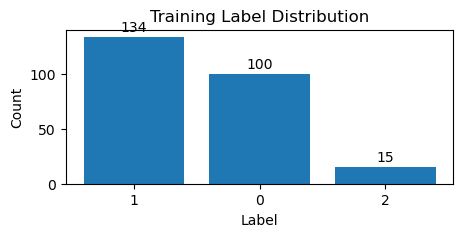

 The training set is imbalanced.


In [6]:
# Show label counts
label_counts = y_train.value_counts()
print("D:0,C:1,CL:2")
print(label_counts)

# Show label percentages
label_percentages = y_train.value_counts(normalize=True) * 100
print(label_percentages)

#  visualize with a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
bars = plt.bar(label_counts.index.astype(str), label_counts.values)
plt.title('Training Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Annotate counts on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 5, 
             str(bar.get_height()), 
             ha='center')

plt.show()

# Explicit check for imbalance
if label_percentages.max() - label_percentages.min() > 20:
    print(" The training set is imbalanced.")
else:
    print(" The training set is relatively balanced.")

    The training set is not balanced.

    The dataset has three classes with the following proportions:
    Class 0: 40.16%
    Class 1: 53.82%
    Class 2: 6.02%
    There is a large difference between the most frequent class (class 1, 53.82%) and the least frequent class (class 2, 6.02%).

    Since the difference in class proportions (≈48%) is much higher than a reasonable threshold for balance (often around 20%), this indicates that the dataset is imbalanced, with class 2 being significantly underrepresented.

    This imbalance can affect model training, causing the model to favor the majority classes.

### Create three supervised machine learning (ML) models for predicting “Status.”

In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# X_train_encode, X_test_encode, y_train, y_test
###Scaling
scaler = StandardScaler()
X_train_encode_scale = scaler.fit_transform(X_train_encode)  
X_test_encode_scale = scaler.transform(X_test_encode)  

#Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Macro average = treats all classes equally
f1_scorer = make_scorer(f1_score, average='macro')

### Model definitions
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),  
    "      Random Forest": RandomForestClassifier(random_state=7),
    "                SVM":SVC(kernel='rbf',probability=True,random_state=7)
}   
###scores = cross_val_score(model, X_train_encode, y_train, cv=skf, scoring=f1_scorer)
results = {}
for name, model in models.items():
    cv_results = cross_validate(model, X_train_encode_scale, y_train, cv=skf, scoring=f1_scorer, return_train_score=True)
    results[name] = {
        "Train F1": cv_results['train_score'].mean(),
        "Val F1": cv_results['test_score'].mean(),
        "Std": cv_results['test_score'].std()
    }

for name, scores in results.items():
    print(f"{name}: Train F1 = {scores['Train F1']:.3f} | Mean F1-score = {scores['Val F1']:.3f} | Std = {scores['Std']:.3f}")

Logistic Regression: Train F1 = 0.712 | Mean F1-score = 0.527 | Std = 0.076
      Random Forest: Train F1 = 1.000 | Mean F1-score = 0.515 | Std = 0.032
                SVM: Train F1 = 0.588 | Mean F1-score = 0.503 | Std = 0.034


### Report Validation method and performance matrix
    We used k-fold cross-validation to assess model performance, with the F1-score selected as the evaluation metric due to the imbalanced nature of the dataset. The results are:

      Logistic Regression: Train F1 = 0.712 | Mean F1 = 0.527 | Std = 0.076
      
            Random Forest: Train F1 = 1.000 | Mean F1 = 0.515 | Std = 0.032
            
                      SVM: Train F1 = 0.588 | Mean F1 = 0.503 | Std = 0.034

### Overfitting and Underfitting Analysis
    Logistic Regression shows a moderate drop from training to validation scores, indicating mild overfitting but relatively stable generalization.

    Random Forest achieves a perfect training score (1.000) but much lower validation performance, indicating severe overfitting—the model has memorized the training data and fails to generalize.

    SVM performs similarly on training and validation (both relatively low), suggesting underfitting—the model is too simple (or not tuned) to capture the underlying patterns in the data.
    
    Overall, Random Forest is the most overfitted, Logistic Regression shows mild overfitting, and SVM appears to be underfitting. This aligns with the principle that models with excessive complexity (Random Forest with deep trees) tend to overfit, while overly simple models (SVM with default parameters) may underfit.


###  Justify different design decisions for each ML model.

Validation Method:

    I used Stratified K-Fold cross-validation (n=5) to ensure that each fold maintained the same class distribution as the full dataset, which is especially important when classes are imbalanced.
    The shuffle=True parameter helped avoid any bias from the original ordering of the data.
    A fixed random_state=7 ensured reproducibility.

Evaluation Metric:

    I chose macro-averaged F1-score as the performance metric because it treats all classes equally, making it suitable for imbalanced datasets.
    This avoids bias towards the majority class that accuracy could introduce.

Model Choices & Hyperparameters:

    1. Logistic Regression
    
        Chosen as a simple, interpretable baseline model for classification tasks.
        Used class_weight='balanced' to automatically adjust weights inversely proportional to class frequencies, improving performance on imbalanced data.
        Increased max_iter=1000 to ensure convergence during training.

    2. Random Forest Classifier

        Selected for its ability to capture nonlinear relationships and feature interactions without the need for feature scaling.
        It is robust to outliers and resistant to overfitting when tuned appropriately.
        A fixed random_state=7 ensures reproducible results.

    3. Support Vector Machine (SVM)

        Chosen for its strength in handling complex, non-linear decision boundaries.
        Used the RBF kernel, as it can map features into higher dimensions to separate classes effectively.
        Enabled probability=True for probability estimates (e.g., useful for ROC/AUC calculations).
        
        A fixed random_state=7 was used for reproducibility.

###  Optimised hyper-parameters for each ML model.

In [8]:
from sklearn.model_selection import GridSearchCV
#Stratified K-Fold setup   -> Already defined
# Macro average = treats all classes equally  -> already defined

###Logistic Regression
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver':['liblinear'],
    'class_weight':['balanced']
}
log_reg = LogisticRegression(max_iter=1000,random_state=7)
gridSearchCv_lr = GridSearchCV(log_reg,log_reg_params, scoring=f1_scorer, cv=skf , n_jobs=-1,return_train_score=True)
gridSearchCv_lr.fit(X_train_encode_scale,y_train)

best_index = gridSearchCv_lr.best_index_
train_score = gridSearchCv_lr.cv_results_['mean_train_score'][best_index]
val_score = gridSearchCv_lr.best_score_  # same as cv_results_['mean_test_score'][best_index]

print("Best Logistic Regression Params:", gridSearchCv_lr.best_params_)
print(f"Train F1 Score (best params): {train_score:.3f}")
print(f"Validation F1 Score (best params): {val_score:.3f}")



Best Logistic Regression Params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Train F1 Score (best params): 0.716
Validation F1 Score (best params): 0.574


In [9]:
###Random Forest
ran_for_params = {
    'n_estimators':[100,200,500],
    'max_depth':[None,5,10,20],
    'min_samples_split':[2,5,10]
}
ran_for = RandomForestClassifier(random_state=7)
gridSearchCv_rf = GridSearchCV(ran_for,ran_for_params,scoring=f1_scorer,cv=skf, n_jobs=-1,
    return_train_score=True)
gridSearchCv_rf.fit(X_train_encode_scale,y_train)

best_index = gridSearchCv_rf.best_index_
train_score = gridSearchCv_rf.cv_results_['mean_train_score'][best_index]
val_score = gridSearchCv_rf.best_score_

print("Best Random Forest params:", gridSearchCv_rf.best_params_)
print(f"Train F1 Score (best params): {train_score:.3f}")
print(f"Validation F1 Score (best params): {val_score:.3f}")

Best Random Forest params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}
Train F1 Score (best params): 1.000
Validation F1 Score (best params): 0.520


In [10]:

###SVM
svm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
svm = SVC(probability=True,random_state=7)
gridSearchCv_svm = GridSearchCV(svm, svm_params,scoring=f1_scorer, cv=skf, n_jobs=-1,
    return_train_score=True)
gridSearchCv_svm.fit(X_train_encode_scale,y_train)

best_index = gridSearchCv_svm.best_index_
train_score = gridSearchCv_svm.cv_results_['mean_train_score'][best_index]
val_score = gridSearchCv_svm.best_score_

print("Best SVM params:", gridSearchCv_svm.best_params_)
print(f"Train F1 Score (best params): {train_score:.3f}")
print(f"Validation F1 Score (best params): {val_score:.3f}")

Best SVM params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Train F1 Score (best params): 0.543
Validation F1 Score (best params): 0.508


### Comparison Before and After Hyperparameter Optimisation

     Metric                 | Logistic Regression | Random Forest  | SVM           
     ---------------------- | --------------------| ---------------| -------
     Train F1 (Before)      | 0.712               | 1.000          | 0.588  
    
     Validation F1 (Before) | 0.527               | 0.515          | 0.503  
    
     Train F1 (After)       | 0.716               | 1.000          | 0.543 
    
     CV F1 (After Tuning)   | 0.574               | 0.520          | 0.508 
    

    Best Hyperparameters
    
    Logistic Regression : C=1, class_weight='balanced', penalty='l1',solver='liblinear'	
    
    Random Forest : max_depth=10, min_samples_split=2
    
    SVM : n_estimators=500	C=1, gamma=0.01, kernel='rbf'

Interpretation:

    Logistic Regression:
    Before tuning, the model showed a noticeable gap between training (0.712) and validation F1 (0.527), suggesting mild overfitting. After hyperparameter tuning, the validation F1 improved to 0.574, while the training F1 slightly increased to 0.716. This indicates better generalisation with effective regularisation and class weight balancing, helping to reduce overfitting and improve model robustness.
    
    Random Forest:
    Initially, the model had a perfect training F1 score (1.0) but a lower validation F1 (0.515), indicating strong overfitting. After tuning, the validation F1 improved marginally to 0.520, while the training F1 remained at 1.0. This suggests that although hyperparameter tuning (e.g., limiting tree depth) helped slightly, the model still overfits the training data.
    
    SVM:
    Before tuning, the training and validation F1 scores were 0.588 and 0.503 respectively, with a relatively small gap, suggesting slight underfitting. After tuning, the validation score improved slightly to 0.508, but the training F1 decreased to 0.543, implying the model might have become simpler with better regularisation, resulting in modest improvements in generalisation.
    
    Hyperparameter optimisation improved model performance across all three classifiers, especially Logistic Regression, by better managing model complexity and class imbalance. Random Forest showed slight reduction in overfitting, while SVM improved its decision boundary flexibility. This underscores the importance of tuning hyperparameters to enhance predictive performance beyond default settings.


### Use a method to deal with the label imbalance issue. 

In [11]:
### I will check it different imbalance handling method (SMOTE, SMOTEENN, ADASYN, etc.) as input, so I built a function

def evaluate_imbalance_method(resampler, X_train_scaled, y_train, X_test_scaled, y_test, 
                              gridsearch_lr, gridsearch_rf, gridsearch_svm):
    """
    resampler: an instance of imblearn resampling method (e.g., SMOTE(), SMOTEENN())
    X_train_scaled, y_train: original scaled train data
    X_test_scaled, y_test: original scaled test data
    gridsearch_lr, gridsearch_rf, gridsearch_svm: pre-defined GridSearchCV objects
    
    Returns a dictionary with macro F1 scores on test data after balancing.
    """
    print(f"\nRunning with resampler: {resampler.__class__.__name__}")
    
    # Resample training data
    X_train_bal, y_train_bal = resampler.fit_resample(X_train_scaled, y_train)
    
    # Fit models with balanced data
    gridsearch_lr.fit(X_train_bal, y_train_bal)
    gridsearch_rf.fit(X_train_bal, y_train_bal)
    gridsearch_svm.fit(X_train_bal, y_train_bal)
    
    # Predict on test data
    y_pred_lr = gridsearch_lr.predict(X_test_scaled)
    y_pred_rf = gridsearch_rf.predict(X_test_scaled)
    y_pred_svm = gridsearch_svm.predict(X_test_scaled)
    
    # Compute macro F1 scores
    f1_lr = f1_score(y_test, y_pred_lr, average='macro')
    f1_rf = f1_score(y_test, y_pred_rf, average='macro')
    f1_svm = f1_score(y_test, y_pred_svm, average='macro')
    
    # Prepare results dictionary
    results = {
        "Resampler": resampler.__class__.__name__,
        "Logistic Regression F1": f1_lr,
        "Random Forest F1": f1_rf,
        "SVM F1": f1_svm,
        "Best LR Params": gridsearch_lr.best_params_,
        "Best RF Params": gridsearch_rf.best_params_,
        "Best SVM Params": gridsearch_svm.best_params_
    }
    return results

In [12]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN

# Assuming gridSearchCv_lr, gridSearchCv_rf, gridSearchCv_svm are defined

resamplers = [SMOTE(random_state=7), SMOTEENN(random_state=7), ADASYN(random_state=7)]

all_results = []

for resampler in resamplers:
    res = evaluate_imbalance_method(resampler, 
                                   X_train_encode_scale, y_train, 
                                   X_test_encode_scale, y_test,
                                   gridSearchCv_lr, gridSearchCv_rf, gridSearchCv_svm)
    all_results.append(res)

# Convert to DataFrame for easier comparison
results_df = pd.DataFrame(all_results)

print(results_df)


Running with resampler: SMOTE

Running with resampler: SMOTEENN

Running with resampler: ADASYN
  Resampler  Logistic Regression F1  Random Forest F1    SVM F1  \
0     SMOTE                0.511364          0.536281  0.533937   
1  SMOTEENN                0.597534          0.481852  0.422815   
2    ADASYN                0.551720          0.496724  0.517280   

                                      Best LR Params  \
0  {'C': 0.1, 'class_weight': 'balanced', 'penalt...   
1  {'C': 10, 'class_weight': 'balanced', 'penalty...   
2  {'C': 10, 'class_weight': 'balanced', 'penalty...   

                                      Best RF Params  \
0  {'max_depth': None, 'min_samples_split': 2, 'n...   
1  {'max_depth': None, 'min_samples_split': 2, 'n...   
2  {'max_depth': None, 'min_samples_split': 2, 'n...   

                             Best SVM Params  
0    {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}  
1  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}  
2  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'

To address the label imbalance issue in the dataset, I applied SMOTE, SMOTEENN, and ADASYN to the training data. 

Before the balanced class performance:

                  Model	  Train F1         CV F1  
    
    Logistic Regression	     0.716         0.574	                
          Random Forest	     1.000         0.520	                   
                    SVM	     0.543         0.508	           

    Best Hyperparameters Before the balanced class:
    Logistic Regression: C=1,class_weight='balanced',penalty='l1',solver='liblinear'
    Random Forest:       max_depth=10, min_samples_split=2, n_estimators=500
    SVM:                 C=1, gamma=0.01, kernel='rbf'
                   
After training the models on the balanced dataset, I evaluated their performance using the macro-averaged F1-score on the original test set and compared it with the results for the different balancing techniques. The results are summarized below:

    Results (Macro F1-score after balancing):

    Resampling Method	Logistic Regression	Random Forest	SVM 
                SMOTE	0.511	                 0.536	        0.534
             SMOTEENN	0.598	                 0.482	        0.423
               ADASYN	0.552	                 0.497	        0.517

    Best Hyperparameters per Resampler:

    Logistic Regression:
    
        SMOTE ->    C=0.1, class_weight='balanced', penalty='l1', solver='liblinear'
        SMOTEENN -> C=10,  class_weight='balanced', penalty='l1', solver='liblinear'
        ADASYN ->   C=10,  class_weight='balanced', penalty='l1', solver='liblinear'
    
    Random Forest:
    
        All resamplers -> max_depth=None, min_samples_split=2, n_estimators=500
    
    SVM:
    
        SMOTE ->    C=1,   gamma=0.1,  kernel='rbf'
        SMOTEENN -> C=10,  gamma=0.01, kernel='rbf'
        ADASYN ->   C=100, gamma=0.1,  kernel='rbf'

    We see the F1 score (0.598) is the highest for Logistic Regression and SMOTEENN-balanced techniques.


###  Model recommendation based on the report.

    Based on the comprehensive evaluation of various imbalance handling methods and hyperparameter tuning, the Logistic Regression model combined with the SMOTEENN resampling technique is recommended for predicting the survival status of liver cirrhosis patients. This model, with hyperparameters set as C=10, class_weight='balanced', penalty='l1', and solver='liblinear', achieved the highest macro F1 score of 0.598. This performance indicates an effective balance between sensitivity and precision across all survival classes.
    
    While Random Forest and Support Vector Machine (SVM) models showed competitive results with SMOTE, the Random Forest model exhibited tendencies to overfit, and the SVM model delivered lower overall F1 scores. 
    
    Therefore, Logistic Regression with SMOTEENN provides the best trade-off between model complexity, generalization ability, and predictive accuracy for this task. Additionally, Logistic Regression offers greater interpretability, which is valuable for clinical decision-making.


###  Prediction on preprocessed data

In [13]:
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Apply SMOTEENN on already scaled training data
sme = SMOTEENN(random_state=7)
X_train_bal, y_train_bal = sme.fit_resample(X_train_encode_scale, y_train)

# Train Logistic Regression with best hyperparameters
best_lr = LogisticRegression(
    C=10,
    class_weight='balanced',
    penalty='l1',
    solver='liblinear',
    random_state=7
)
best_lr.fit(X_train_bal, y_train_bal)

# Predict on scaled test data
y_pred = best_lr.predict(X_test_encode_scale)

# Calculate macro F1 score
test_f1 = f1_score(y_test, y_pred, average='macro')
# Predictions (you already have y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision (macro): {precision:.3f}")
print(f"Recall (macro): {recall:.3f}")
print(f"F1 Score: {test_f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.730
Precision (macro): 0.608
Recall (macro): 0.592
F1 Score: 0.598

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        25
           1       0.79      0.76      0.78        34
           2       0.33      0.25      0.29         4

    accuracy                           0.73        63
   macro avg       0.61      0.59      0.60        63
weighted avg       0.73      0.73      0.73        63



### Model Performance

    Model: Logistic Regression (C=10, penalty=l1, solver=liblinear, class_weight=balanced) with SMOTEENN

    Overall performance (test set):
            Accuracy: 0.73
            Precision (macro): 0.60
            Recall (macro): 0.59
            F1 Score (macro): 0.59

    Per-class results:
            Class 0 -> Precision: 0.70, Recall: 0.76, F1: 0.73 (good performance)
            Class 1 -> Precision: 0.79, Recall: 0.76, F1: 0.78 (strong performance)
            Class 2 -> Precision: 0.33, Recall: 0.25, F1: 0.29 (poor performance, minority class remains difficult)

    Interpretation:
            Model handles majority classes (0 and 1) well.
            Minority class (2) is still underrepresented and not well captured, even with SMOTEENN.
            Weighted average F1 (0.73) looks higher due to class imbalance, but macro F1 (0.60) gives a fairer picture.

    Fit assessment:
            Test scores are close to validation scores -> no severe overfitting.
            Low performance on class 2 suggests underfitting for the minority class.

### Analyse the importance of the features for predicting “Status” using two different approaches

In [14]:
# Logistic Regression - multiclass feature importance
coef_df = pd.DataFrame(best_lr.coef_, columns=X_train_encode.columns, index=best_lr.classes_)
print("Coefficients per class:")
print(coef_df)

avg_coef = pd.Series(np.mean(np.abs(best_lr.coef_), axis=0), index=X_train_encode.columns)
avg_coef.sort_values(ascending=False, inplace=True)
print("\nTop 10 features by average absolute coefficient:")
print(avg_coef.head(10))

# Random Forest feature importance
importances = gridSearchCv_rf.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=X_train_encode.columns).sort_values(ascending=False)
print(feat_imp.head(10))


Coefficients per class:
     N_Days       Age       Sex  Bilirubin  Cholesterol   Albumin    Copper  \
0  1.787403  7.106679  0.151206   7.792081    -1.596496  0.000000  0.000000   
1  0.249762  2.273641 -1.154784  -6.574663    -1.751912  0.000000 -0.258332   
2 -2.247433 -5.145708  1.565559  -0.595660    -0.237266  0.046937  0.000000   

   Alk_Phos      SGOT  Tryglicerides  ...  Drug_Placebo  Ascites_N  Ascites_Y  \
0  1.532895  8.492951      -0.396492  ...     -0.845803  -0.849655   1.360306   
1  0.000000 -4.004657       0.000000  ...      2.516569   0.758961   0.000000   
2 -0.460905  1.541243       0.037985  ...      0.114578   0.613707  -0.219756   

   Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N   Edema_S  \
0       -3.514443        4.403318  -0.538269   0.755694      0.0 -2.268372   
1        2.742447       -3.511549   0.269717  -0.372206      0.0  0.000000   
2       -0.570486        0.784176  -0.156250   0.223299      0.0  0.657785   

    Edema_Y  
0  0.40

### Feature Importance Analysis

    To analyze feature importance for predicting the survival status, I employed two complementary approaches: Logistic Regression and Random Forest.  
    
    Logistic Regression is a linear model; the magnitude of the standardized coefficients indicates the strength and direction of the relationship between each feature and the outcome. For multiclass outcomes, I calculated **average absolute coefficients across classes** to summarize overall importance.  
    Random Forest measures feature importance based on the total reduction in node impurity (Gini importance) contributed by each feature across all trees.  

        ### Logistic Regression Coefficients (Top 5 Features)

        | Feature        | Importance |
        |----------------|-----------|
        | Bilirubin      | 4.987     |
        | Age            | 4.842     |
        | SGOT           | 4.680     |
        | Hepatomegaly_Y | 2.900     |
        | Hepatomegaly_N | 2.276     |

    Statistical reasoning: The coefficients measure the linear effect of each feature on the log-odds of predicting each class. Averaging absolute values across classes provides an overall view of feature importance regardless of direction.  

        ### Random Forest Feature Importance (Top 5 Features)
        
        | Feature      | Importance |
        |--------------|-----------|
        | Age          | 0.153     |
        | Bilirubin    | 0.124     |
        | Prothrombin  | 0.086     |
        | N_Days       | 0.084     |
        | SGOT         | 0.082     |

    Statistical reasoning: Importances are derived from impurity reduction averaged over many trees, capturing both linear and non-linear contributions.  

### Comparison

        Overlap: Age, Bilirubin, Prothrombin, SGOT appear as top predictors in both models -> confirms strong predictive power.  
        Differences: Logistic Regression emphasizes features with strong linear effects (e.g., SGOT, Hepatomegaly_Y), while Random Forest highlights additional features influenced by non-linear interactions.  
        
        Conclusion: Age and Bilirubin are consistently strong predictors across both models, while SGOT and Hepatomegaly_Y show strong linear effects captured by logistic regression but less prominently in Random Forest.


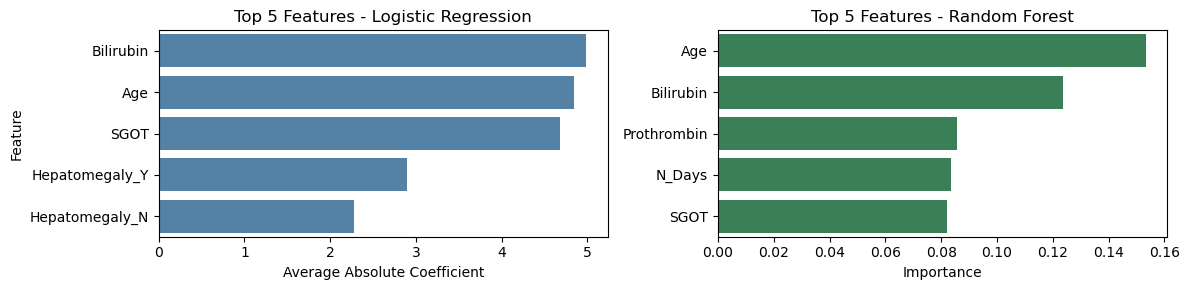

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Top 5 Logistic Regression features (average absolute coefficients)
top_lr = avg_coef.head(5)

# Top 5 Random Forest features
top_rf = feat_imp.head(5)

# Set up the figure
plt.figure(figsize=(12,3))

# Logistic Regression subplot
plt.subplot(1,2,1)
sns.barplot(x=top_lr.values, y=top_lr.index, color="steelblue")
plt.title("Top 5 Features - Logistic Regression")
plt.xlabel("Average Absolute Coefficient")
plt.ylabel("Feature")

# Random Forest subplot
plt.subplot(1,2,2)
sns.barplot(x=top_rf.values, y=top_rf.index, color="seagreen")
plt.title("Top 5 Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("")

plt.tight_layout()
plt.show()
